In [1]:
from utilities import DataPreProcessor
import pandas as pd

In [2]:
dpp = DataPreProcessor()
dpp.load_data(download=True)
dpp.show_data_info(3, only_head=True)

df  = dpp.get_data()

d:\CODE\STAT7008_Group6b_2024\utilities\data_processor.py:90: DtypeWarning: Columns (19,55) have mixed types. Specify dtype option on import or set low_memory=False.
  self.data: pd.DataFrame = pd.read_csv(self.input_path, index_col=0)


processed: False
data head: 
          member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
id                                                                        
1077501    1296599     5000.0       5000.0           4975.0   36 months   
1077430    1314167     2500.0       2500.0           2500.0   60 months   
1077175    1313524     2400.0       2400.0           2400.0   36 months   

         int_rate  installment grade sub_grade emp_title  ... total_bal_il  \
id                                                        ...                
1077501     10.65       162.87     B        B2       NaN  ...          NaN   
1077430     15.27        59.83     C        C4     Ryder  ...          NaN   
1077175     15.96        84.33     C        C5       NaN  ...          NaN   

        il_util  open_rv_12m open_rv_24m max_bal_bc all_util total_rev_hi_lim  \
id                                                                              
1077501     NaN          NaN         NaN 

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

null_percentages = df.isnull().mean() * 100


{'emp_title': [5.79933, dtype('O')]}
{'emp_length': [5.05139, dtype('O')]}
{'annual_inc': [0.00045, dtype('float64')]}
{'desc': [85.79795, dtype('O')]}
{'title': [0.01724, dtype('O')]}
{'delinq_2yrs': [0.00327, dtype('float64')]}
{'earliest_cr_line': [0.00327, dtype('O')]}
{'inq_last_6mths': [0.00327, dtype('float64')]}
{'mths_since_last_delinq': [51.19706, dtype('float64')]}
{'mths_since_last_record': [84.5553, dtype('float64')]}
{'open_acc': [0.00327, dtype('float64')]}
{'pub_rec': [0.00327, dtype('float64')]}
{'revol_util': [0.05657, dtype('float64')]}
{'total_acc': [0.00327, dtype('float64')]}
{'last_pymnt_d': [1.99002, dtype('O')]}
{'next_pymnt_d': [28.50766, dtype('O')]}
{'last_credit_pull_d': [0.00597, dtype('O')]}
{'collections_12_mths_ex_med': [0.01634, dtype('float64')]}
{'mths_since_last_major_derog': [75.01597, dtype('float64')]}
{'annual_inc_joint': [99.94241, dtype('float64')]}
{'dti_joint': [99.94264, dtype('float64')]}
{'verification_status_joint': [99.94241, dtype('O')

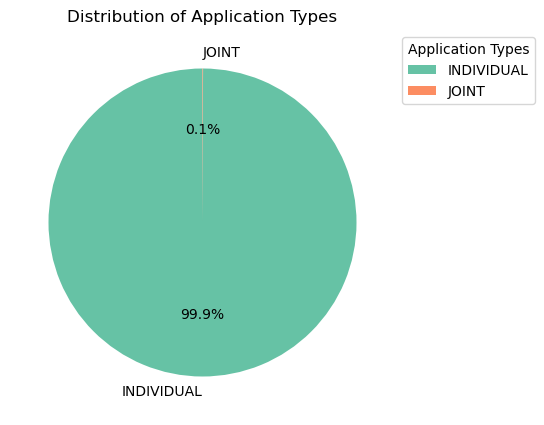

In [4]:
for column, percentage in null_percentages.items():

  if percentage:

    print({column: [round(percentage, 5), df[column].dtype]})

# Get the value counts for 'application_type'
application_type_counts = df['application_type'].value_counts()

# Set up the figure
plt.figure(figsize=(8, 5))

# Create the pie chart
plt.pie(application_type_counts.values, labels=application_type_counts.index, autopct='%1.1f%%', 
        startangle=90, colors=sns.color_palette('Set2'))

# Add a legend
plt.legend(application_type_counts.index, title="Application Types", bbox_to_anchor=(1, 1), loc="best")

# Set title
plt.title('Distribution of Application Types')

# Display the plot
plt.show()

member_id            0.000000
loan_amnt            0.000000
funded_amnt          0.000000
funded_amnt_inv      0.000000
term                 0.000000
                      ...    
all_util            68.101761
total_rev_hi_lim     0.000000
inq_fi              68.101761
total_cu_tl         68.101761
inq_last_12m        68.101761
Length: 73, dtype: float64


C:\Users\SWORWOOD\AppData\Local\Temp\ipykernel_6408\1010375606.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=joint_na_percentages.values, y=joint_na_percentages.index, palette='Set2')


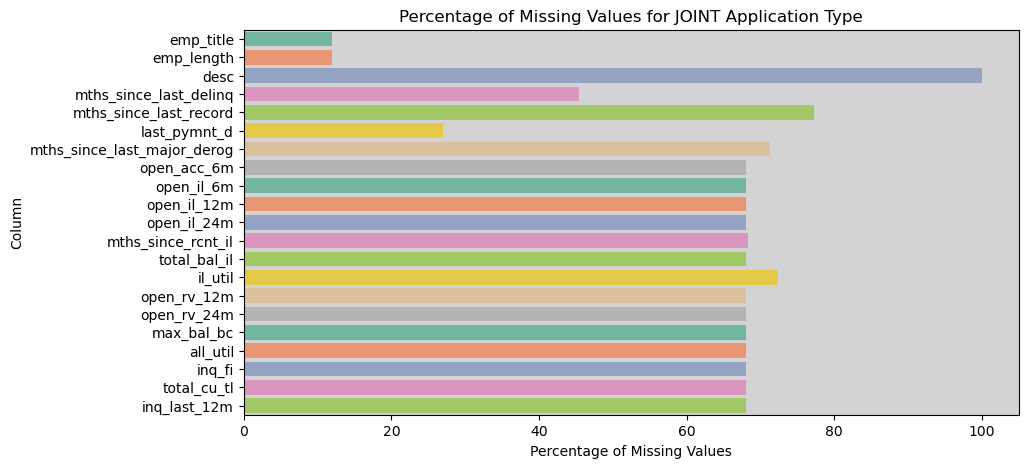

In [5]:
# Get the percentage of missing values for the 'JOINT' application type
joint_na_percentages = df[df['application_type'] == 'JOINT'].isna().mean() * 100
print(joint_na_percentages) 
# Filter columns with more than 5% missing values
joint_na_percentages = joint_na_percentages[joint_na_percentages > 5]

# Set up the figure
plt.figure(figsize=(10, 5))

# Create the bar plot using Seaborn
sns.barplot(x=joint_na_percentages.values, y=joint_na_percentages.index, palette='Set2')

# Add labels and title
plt.xlabel('Percentage of Missing Values')
plt.ylabel('Column')
plt.title('Percentage of Missing Values for JOINT Application Type')

# Customize plot and background color
plt.gca().set_facecolor('lightgray')  # Background color inside the plot

# Show the plot
plt.show()

member_id            0.000000
loan_amnt            0.000000
funded_amnt          0.000000
funded_amnt_inv      0.000000
term                 0.000000
                      ...    
all_util            97.608551
total_rev_hi_lim     7.924065
inq_fi              97.608551
total_cu_tl         97.608551
inq_last_12m        97.608551
Length: 73, dtype: float64


C:\Users\SWORWOOD\AppData\Local\Temp\ipykernel_6408\405644139.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=individual_na_percentages.values, y=individual_na_percentages.index, palette='Set2')


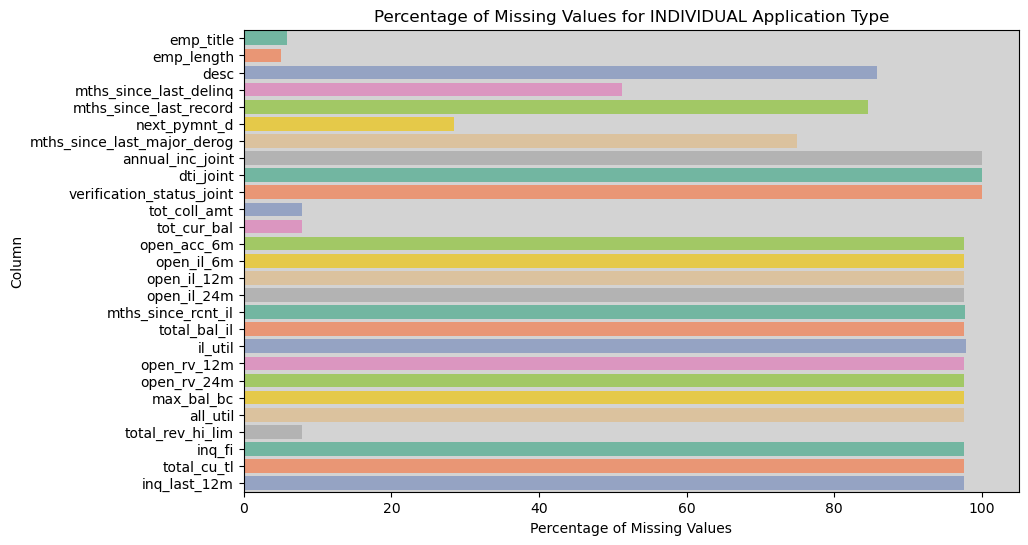

In [6]:
# Get the percentage of missing values for the 'INDIVIDUAL' application type
individual_na_percentages = df[df['application_type'] == 'INDIVIDUAL'].isna().mean() * 100
print(individual_na_percentages)

# Filter columns with more than 5% missing values
individual_na_percentages = individual_na_percentages[individual_na_percentages > 5]

# Set up the figure
plt.figure(figsize=(10, 6))

# Create the bar plot using Seaborn
sns.barplot(x=individual_na_percentages.values, y=individual_na_percentages.index, palette='Set2')

# Add labels and title
plt.xlabel('Percentage of Missing Values')
plt.ylabel('Column')
plt.title('Percentage of Missing Values for INDIVIDUAL Application Type')

# Customize plot and background color
plt.gca().set_facecolor('lightgray')  # Background color inside the plot

# Show the plot
plt.show()

In [7]:
df.shape

(887379, 73)

In [8]:
# precossing the data, drop JOINT records to keep all values for INDIVIDUAL application_type
# since the JOINT application_type is not similar to the INDIVIDUAL application_type and has relatively low instances
df = df[df['application_type'] != 'JOINT']
df.shape

(886868, 73)

In [9]:
# processing the data, drop columns with 'joint' in the name and the 'application_type' column
columns_to_drop = [i for i in df.columns if 'joint' in i]

columns_to_drop.append('application_type')

print(columns_to_drop)

df.drop(columns=columns_to_drop, inplace=True)

df.shape

['annual_inc_joint', 'dti_joint', 'verification_status_joint', 'application_type']


C:\Users\SWORWOOD\AppData\Local\Temp\ipykernel_6408\3545955394.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=columns_to_drop, inplace=True)


(886868, 69)

C:\Users\SWORWOOD\AppData\Local\Temp\ipykernel_6408\2496858889.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=na_percentages.values, y=na_percentages.index, palette='Set2')


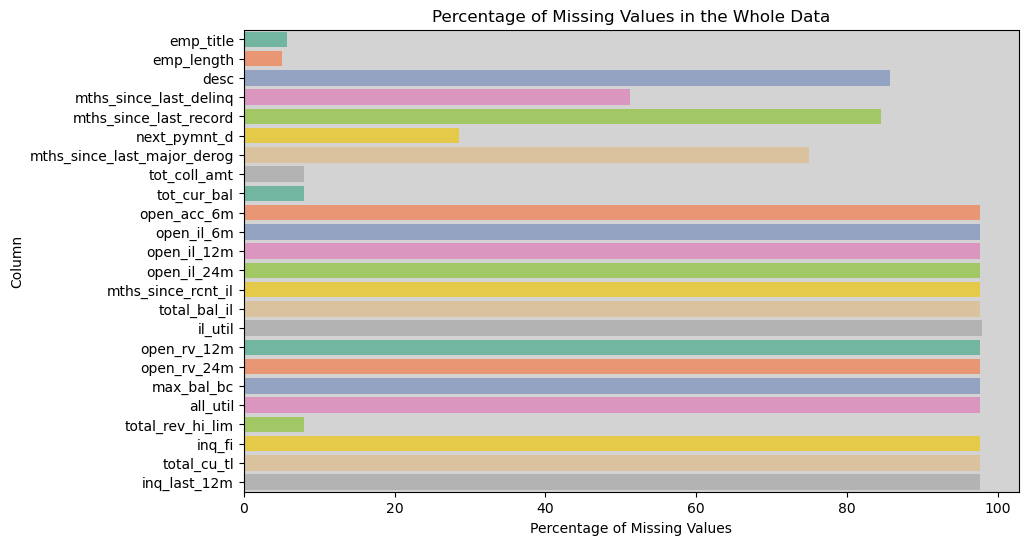

In [10]:
# Get the percentage of missing values for the entire DataFrame
na_percentages = df.isna().mean() * 100

# Filter columns with more than 5% missing values
na_percentages = na_percentages[na_percentages > 5]

# Set up the figure
plt.figure(figsize=(10, 6))

# Create the bar plot using Seaborn
sns.barplot(x=na_percentages.values, y=na_percentages.index, palette='Set2')

# Add labels and title
plt.xlabel('Percentage of Missing Values')
plt.ylabel('Column')
plt.title('Percentage of Missing Values in the Whole Data')

# Customize plot and background color
plt.gca().set_facecolor('lightgray')  # Background color inside the plot

# Show the plot
plt.show()

In [11]:
# processing the data, drop columns with more than 20% missing values
columns_to_drop = []

for i in df.columns:
  
  if df[i].isna().mean()*100 > 20:

    columns_to_drop.append(i)

print(columns_to_drop)

df.drop(columns=columns_to_drop, inplace=True)

for i in df.columns:

  print({i: df[i].nunique()})

['desc', 'mths_since_last_delinq', 'mths_since_last_record', 'next_pymnt_d', 'mths_since_last_major_derog', 'open_acc_6m', 'open_il_6m', 'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util', 'inq_fi', 'total_cu_tl', 'inq_last_12m']
{'member_id': 886868}
{'loan_amnt': 1372}
{'funded_amnt': 1372}
{'funded_amnt_inv': 9856}
{'term': 2}
{'int_rate': 542}
{'installment': 68701}


C:\Users\SWORWOOD\AppData\Local\Temp\ipykernel_6408\1154498131.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=columns_to_drop, inplace=True)


{'grade': 7}
{'sub_grade': 35}
{'emp_title': 299159}
{'emp_length': 11}
{'home_ownership': 6}
{'annual_inc': 49345}
{'verification_status': 3}
{'issue_d': 103}
{'loan_status': 10}
{'pymnt_plan': 2}
{'url': 886868}
{'purpose': 14}
{'title': 63143}
{'zip_code': 935}
{'addr_state': 51}
{'dti': 4000}
{'delinq_2yrs': 29}
{'earliest_cr_line': 696}
{'inq_last_6mths': 28}
{'open_acc': 77}
{'pub_rec': 32}
{'revol_bal': 73738}
{'revol_util': 1356}
{'total_acc': 135}
{'initial_list_status': 2}
{'out_prncp': 248246}
{'out_prncp_inv': 266137}
{'total_pymnt': 506637}
{'total_pymnt_inv': 506515}
{'total_rec_prncp': 260185}
{'total_rec_int': 324623}
{'total_rec_late_fee': 6181}
{'recoveries': 23055}
{'collection_recovery_fee': 20708}
{'last_pymnt_d': 98}
{'last_pymnt_amnt': 232437}
{'last_credit_pull_d': 103}
{'collections_12_mths_ex_med': 12}
{'policy_code': 1}
{'acc_now_delinq': 8}
{'tot_coll_amt': 10321}
{'tot_cur_bal': 327230}
{'total_rev_hi_lim': 21249}


In [12]:
# check the number of unique values less than 10
for i in df.columns:

    if df[i].nunique() < 10:

        print({i: df[i].value_counts()})


{'term': term
 36 months    620886
 60 months    265982
Name: count, dtype: int64}
{'grade': grade
B    254433
C    245717
A    148184
D    139419
E     70614
F     23022
G      5479
Name: count, dtype: int64}
{'home_ownership': home_ownership
MORTGAGE    443203
RENT        355995
OWN          87435
OTHER          182
NONE            50
ANY              3
Name: count, dtype: int64}
{'verification_status': verification_status
Source Verified    329424
Verified           290810
Not Verified       266634
Name: count, dtype: int64}
{'pymnt_plan': pymnt_plan
n    886858
y        10
Name: count, dtype: int64}
{'initial_list_status': initial_list_status
f    456703
w    430165
Name: count, dtype: int64}
{'policy_code': policy_code
1.0    886868
Name: count, dtype: int64}
{'acc_now_delinq': acc_now_delinq
0.0     882726
1.0       3865
2.0        208
3.0         28
4.0          7
5.0          3
6.0          1
14.0         1
Name: count, dtype: int64}


In [13]:
# processing the data, drop columns with only one unique value
columns_to_drop = ['policy_code']

df.drop(columns=columns_to_drop, inplace=True)

df.shape

C:\Users\SWORWOOD\AppData\Local\Temp\ipykernel_6408\375100523.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=columns_to_drop, inplace=True)


(886868, 49)

In [14]:
df.head(3)

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,...,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
id,,,,,,,,,,,,,,,,,,,,,
1077501,1296599,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,B2,NaN,...,0.00,0.00,Jan-2015,171.62,Jan-2016,0.0,0.0,NaN,NaN,NaN
1077430,1314167,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,C4,Ryder,...,117.08,1.11,Apr-2013,119.66,Sep-2013,0.0,0.0,NaN,NaN,NaN
1077175,1313524,2400.0,2400.0,2400.0,36 months,15.96,84.33,C,C5,NaN,...,0.00,0.00,Jun-2014,649.91,Jan-2016,0.0,0.0,NaN,NaN,NaN


In [15]:
print(df[['grade', 'sub_grade']].head(5))
print(df['grade'].unique())
sub_grades = df['sub_grade'].unique()

sub_grades.sort()

sub_grades

        grade sub_grade
id                     
1077501     B        B2
1077430     C        C4
1077175     C        C5
1076863     C        C1
1075358     B        B5
['B' 'C' 'A' 'E' 'F' 'D' 'G']


array(['A1', 'A2', 'A3', 'A4', 'A5', 'B1', 'B2', 'B3', 'B4', 'B5', 'C1',
       'C2', 'C3', 'C4', 'C5', 'D1', 'D2', 'D3', 'D4', 'D5', 'E1', 'E2',
       'E3', 'E4', 'E5', 'F1', 'F2', 'F3', 'F4', 'F5', 'G1', 'G2', 'G3',
       'G4', 'G5'], dtype=object)

In [16]:
# processing the data, drop the some columns
df.drop(columns=['member_id', 'url', 'issue_d', 'earliest_cr_line', 'grade', 'last_credit_pull_d', 'pymnt_plan'], inplace=True)

df.shape

C:\Users\SWORWOOD\AppData\Local\Temp\ipykernel_6408\402901508.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=['member_id', 'url', 'issue_d', 'earliest_cr_line', 'grade', 'last_credit_pull_d', 'pymnt_plan'], inplace=True)


(886868, 42)

In [17]:
# processing the data, drop the some columns by experience
df.drop(columns=['emp_title', 'title', 'zip_code', 'addr_state', 'last_pymnt_d'], inplace=True)

df.shape

C:\Users\SWORWOOD\AppData\Local\Temp\ipykernel_6408\803088860.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=['emp_title', 'title', 'zip_code', 'addr_state', 'last_pymnt_d'], inplace=True)


(886868, 37)

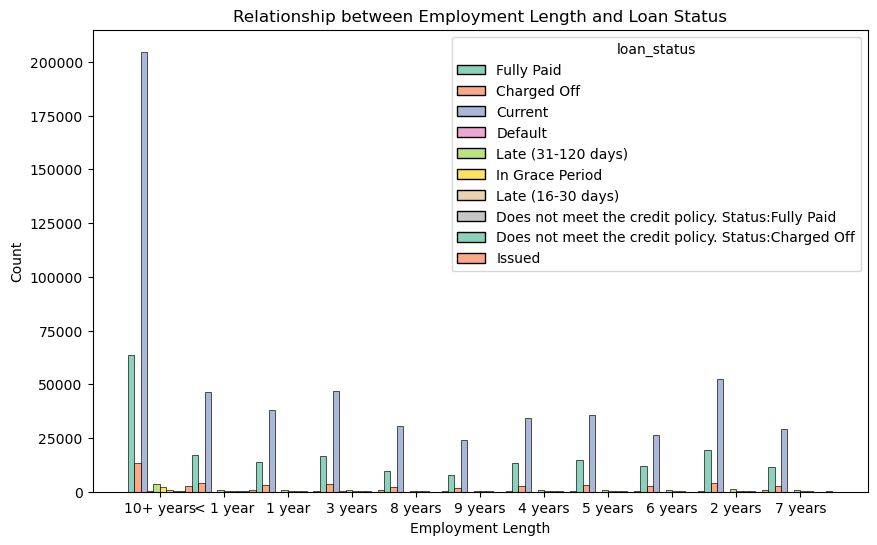

In [18]:
# Set up the figure
plt.figure(figsize=(10, 6))

# Create the histogram using Seaborn
sns.histplot(data=df, x="emp_length", hue="loan_status", multiple="dodge", palette='Set2')

# Add title and axis labels
plt.title("Relationship between Employment Length and Loan Status")
plt.xlabel("Employment Length")
plt.ylabel("Count")

# Show the plot
plt.show()

In [19]:
# processing the data, drop the 'emp_length' column, since it has no significant impact on the target variable
df.drop(columns=['emp_length'], inplace=True)

df.shape

C:\Users\SWORWOOD\AppData\Local\Temp\ipykernel_6408\3163414203.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=['emp_length'], inplace=True)


(886868, 36)

C:\Users\SWORWOOD\AppData\Local\Temp\ipykernel_6408\4003255981.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=na_percentages.values, x=na_percentages.index, palette='Set2')


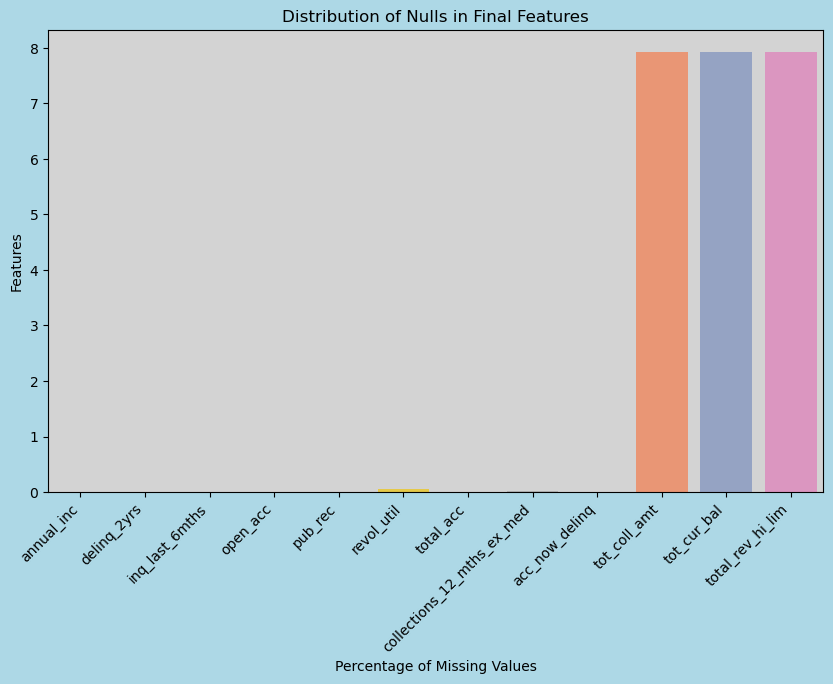

<class 'pandas.core.frame.DataFrame'>
Index: 886868 entries, 1077501 to 36271262
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   annual_inc                  886864 non-null  float64
 1   delinq_2yrs                 886839 non-null  float64
 2   inq_last_6mths              886839 non-null  float64
 3   open_acc                    886839 non-null  float64
 4   pub_rec                     886839 non-null  float64
 5   revol_util                  886366 non-null  float64
 6   total_acc                   886839 non-null  float64
 7   collections_12_mths_ex_med  886723 non-null  float64
 8   acc_now_delinq              886839 non-null  float64
 9   tot_coll_amt                816592 non-null  float64
 10  tot_cur_bal                 816592 non-null  float64
 11  total_rev_hi_lim            816592 non-null  float64
dtypes: float64(12)
memory usage: 88.0 MB


In [20]:
importante_features = df.columns
len(importante_features)

# handle missing values


# Get the percentage of missing values for the entire DataFrame
na_percentages = df.isna().mean() * 100

# Filter columns with any missing values
na_percentages = na_percentages[na_percentages > 0]

# Set up the figure
plt.figure(figsize=(10, 6))

# Create the bar plot using Seaborn
sns.barplot(y=na_percentages.values, x=na_percentages.index, palette='Set2')

# Add labels and title
plt.xlabel('Percentage of Missing Values')
plt.ylabel('Features')
plt.title('Distribution of Nulls in Final Features')

# Rotate x-axis labels
plt.xticks(rotation=45, ha='right')  # Rotate labels and align them to the right

# Customize background color
plt.gca().set_facecolor('lightgray')  # Background color inside the plot
plt.gcf().set_facecolor('lightblue')  # Figure background color

# Display the plot
plt.show()

df[na_percentages.index].info()

In [21]:
print(df.shape)

# processing the data, drop rows with missing values less than 1%

for i in na_percentages.index:

  if na_percentages[i] < 1:

    df.dropna(subset=[i], inplace=True)

print(df.shape)

(886868, 36)


C:\Users\SWORWOOD\AppData\Local\Temp\ipykernel_6408\4239386764.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(subset=[i], inplace=True)
C:\Users\SWORWOOD\AppData\Local\Temp\ipykernel_6408\4239386764.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(subset=[i], inplace=True)
C:\Users\SWORWOOD\AppData\Local\Temp\ipykernel_6408\4239386764.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(subset=[i], 

(886253, 36)


C:\Users\SWORWOOD\AppData\Local\Temp\ipykernel_6408\4239386764.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(subset=[i], inplace=True)
C:\Users\SWORWOOD\AppData\Local\Temp\ipykernel_6408\4239386764.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(subset=[i], inplace=True)


In [22]:
importante_features

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'sub_grade', 'home_ownership', 'annual_inc',
       'verification_status', 'loan_status', 'purpose', 'dti', 'delinq_2yrs',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'initial_list_status', 'out_prncp', 'out_prncp_inv',
       'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_amnt', 'collections_12_mths_ex_med', 'acc_now_delinq',
       'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim'],
      dtype='object')

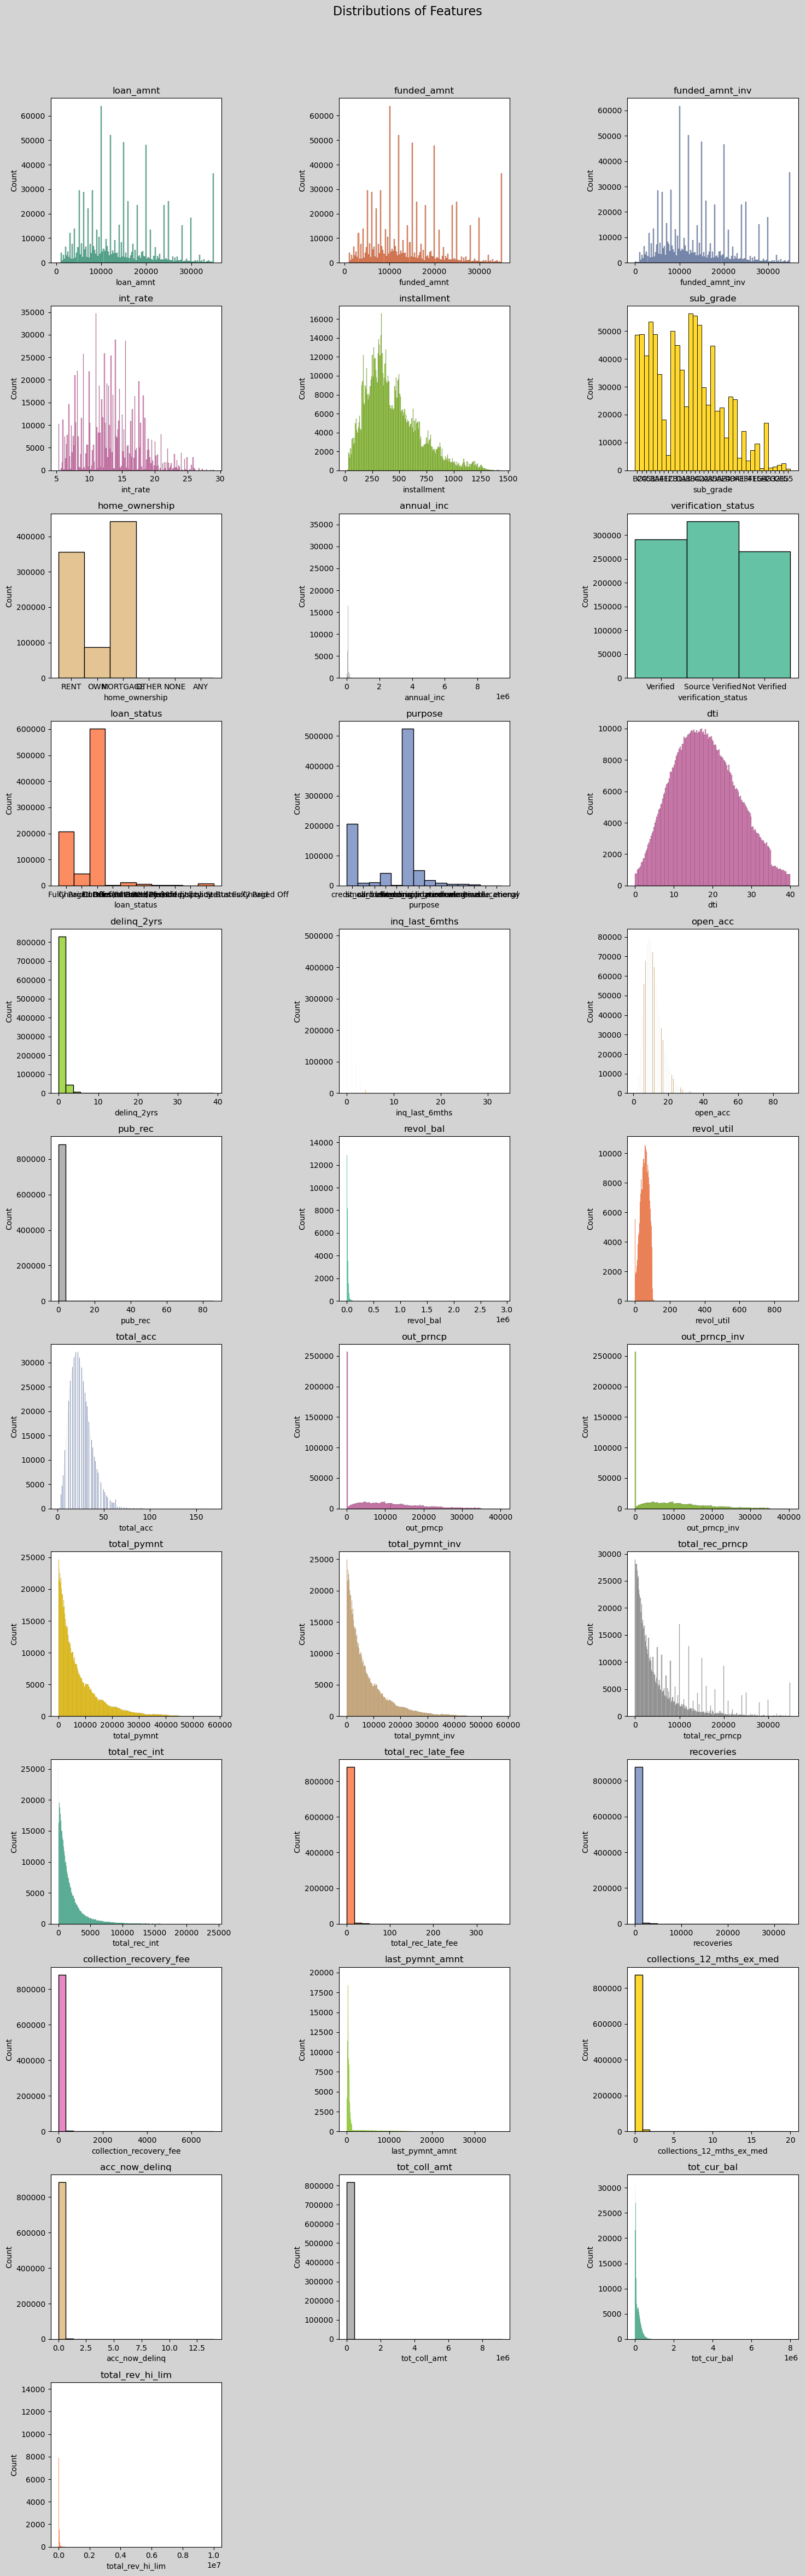

In [23]:
# plot all the features

features = [col for col in df.columns if df[col].nunique() > 2]

rows = (len(features) + 2) // 3

cols = 3

# Set up the figure and axis for subplots

fig, axes = plt.subplots(rows, cols, figsize=(cols * 5, rows * 4))

axes = axes.flatten()  # Flatten in case of multiple rows


fig.patch.set_facecolor('lightgray')  # Set the background color of the entire figure


palette = sns.color_palette('Set2', len(features))


plotted_df = df.copy()

plotted_df['diff_loan_funded'] = plotted_df['loan_amnt'] - plotted_df['funded_amnt']

for i, col in enumerate(features):

    sns.histplot(x=plotted_df[col], kde=False, ax=axes[i], color=palette[i], alpha=1)  # Set alpha slightly transparent for better visualization

    axes[i].set_title(col)

# Remove any empty subplots (in case the number of features doesn't fill the grid)

for j in range(i + 1, len(axes)):

    fig.delaxes(axes[j])

fig.suptitle("Distributions of Features", fontsize=16)

plt.tight_layout(rect=[0, 0, 1, 0.96])  # Leave space for the main title

plt.show()

# Some further analysis

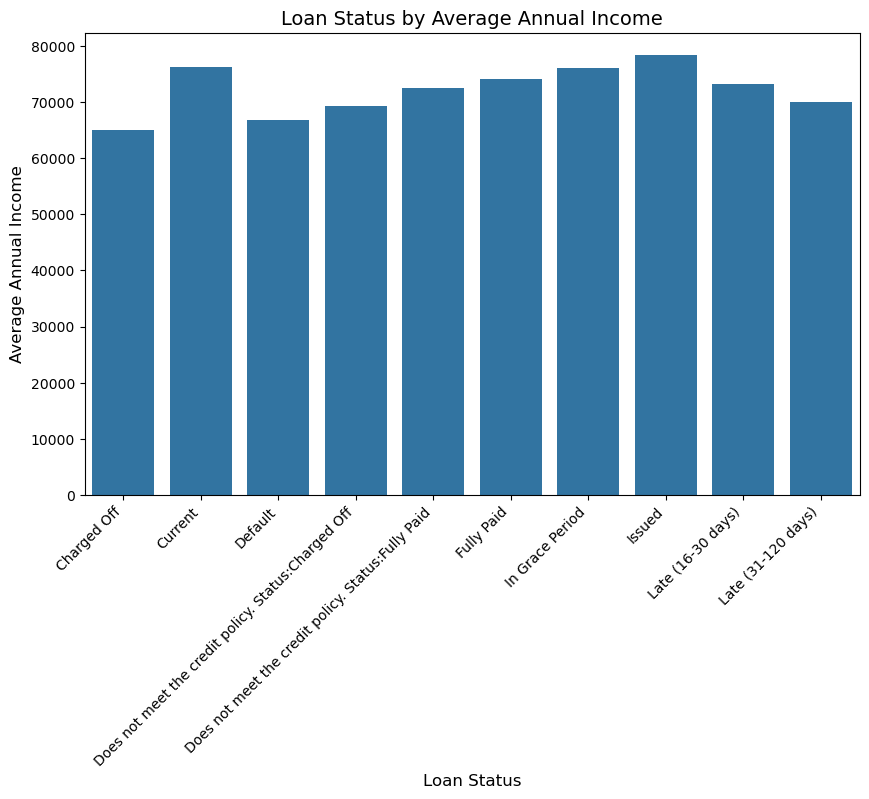

In [24]:
avg_income = df.groupby('loan_status')['annual_inc'].mean().reset_index()



plt.figure(figsize=(10, 6))

sns.barplot(y='annual_inc',x='loan_status', data=avg_income)



plt.title('Loan Status by Average Annual Income', fontsize=14)

plt.xlabel('Loan Status', fontsize=12)

plt.ylabel('Average Annual Income', fontsize=12)

plt.xticks(rotation=45, ha='right')



plt.show()

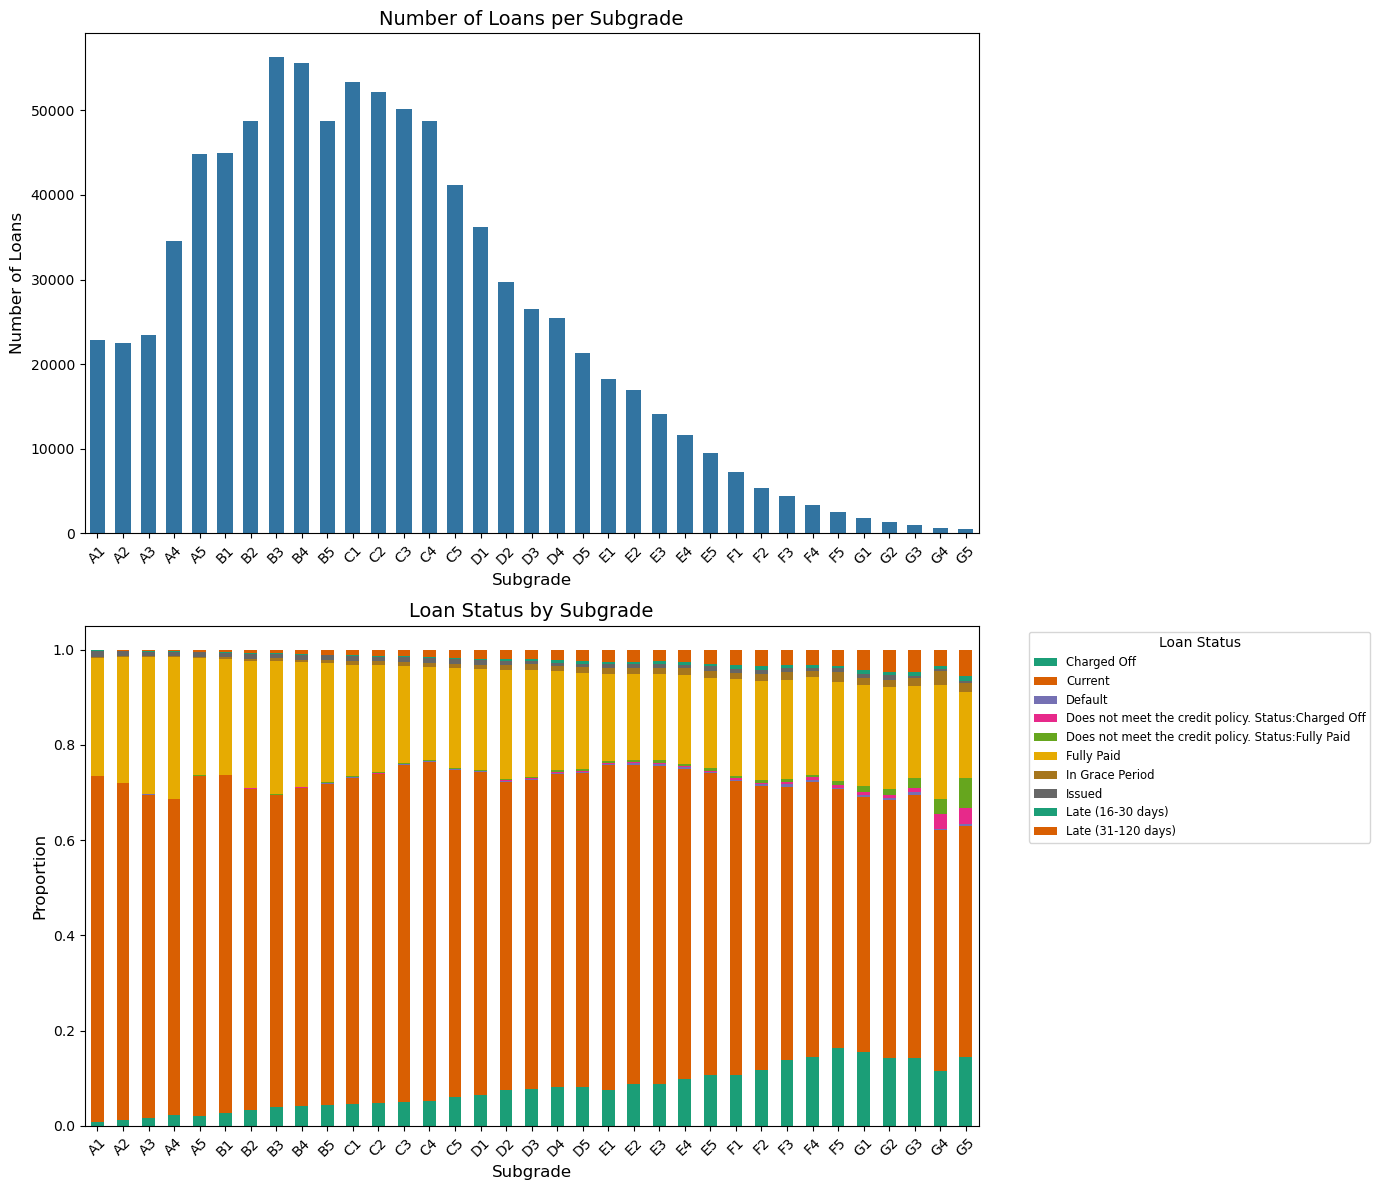

In [25]:
subgrade_counts = df['sub_grade'].value_counts().sort_index()



subgrade_proportions = df.groupby(['sub_grade', 'loan_status']).size().unstack(fill_value=0)

subgrade_proportions = subgrade_proportions.div(subgrade_proportions.sum(axis=1), axis=0)



fig, axes = plt.subplots(2, 1, figsize=(14, 12))

ax1, ax2 = axes[0], axes[1]



sns.barplot(x=subgrade_counts.index, y=subgrade_counts.values, ax=ax1, width=0.6)

ax1.set_title('Number of Loans per Subgrade', fontsize=14)

ax1.set_xlabel('Subgrade', fontsize=12)

ax1.set_ylabel('Number of Loans', fontsize=12)

ax1.tick_params(axis='x', rotation=45)



subgrade_proportions.plot(kind='bar', stacked=True, ax=ax2, color=sns.color_palette('Dark2'))

ax2.set_title('Loan Status by Subgrade', fontsize=14)

ax2.set_xlabel('Subgrade', fontsize=12)

ax2.set_ylabel('Proportion', fontsize=12)

ax2.tick_params(axis='x', rotation=45)

ax2.legend(title='Loan Status', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize='small')



plt.tight_layout()

plt.show()

<Figure size 800x1000 with 0 Axes>

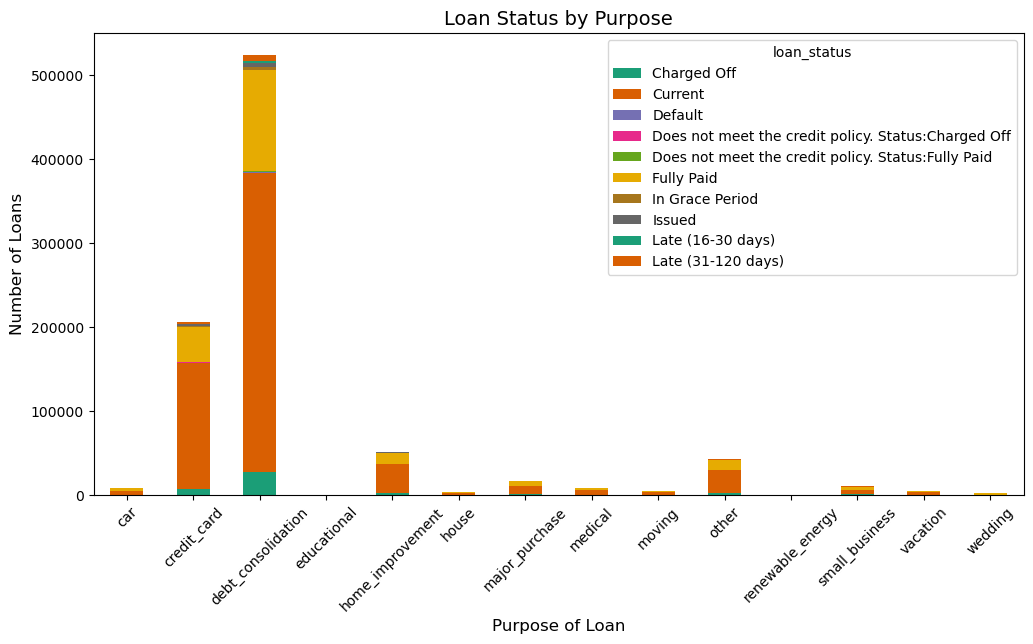

In [26]:
purpose_status_counts = df.groupby(['purpose', 'loan_status']).size().unstack(fill_value=0)



plt.figure(figsize=(8, 10))

purpose_status_counts.plot(kind='bar', stacked=True, figsize=(12, 6), color=sns.color_palette('Dark2'))



plt.title('Loan Status by Purpose', fontsize=14)

plt.xlabel('Purpose of Loan', fontsize=12)

plt.ylabel('Number of Loans', fontsize=12)

plt.xticks(rotation=45)



plt.show()

# Encoding Analysis

In [27]:
categorical_features = df.select_dtypes(include='object').drop(columns=['loan_status'])
categorical_features.head()


,term,sub_grade,home_ownership,verification_status,purpose,initial_list_status
id,,,,,,
1077501,36 months,B2,RENT,Verified,credit_card,f
1077430,60 months,C4,RENT,Source Verified,car,f
1077175,36 months,C5,RENT,Not Verified,small_business,f
1076863,36 months,C1,RENT,Source Verified,other,f
1075358,60 months,B5,RENT,Source Verified,other,f


In [28]:
for i in categorical_features.columns:

  print({i: categorical_features[i].value_counts()})

{'term': term
 36 months    620387
 60 months    265866
Name: count, dtype: int64}
{'sub_grade': sub_grade
B3    56283
B4    55568
C1    53329
C2    52179
C3    50097
C4    48785
B5    48774
B2    48748
B1    44951
A5    44791
C5    41168
D1    36164
A4    34511
D2    29754
D3    26507
D4    25506
A3    23444
A1    22907
A2    22467
D5    21345
E1    18234
E2    16960
E3    14105
E4    11687
E5     9542
F1     7203
F2     5374
F3     4422
F4     3399
F5     2589
G1     1864
G2     1388
G3      978
G4      659
G5      571
Name: count, dtype: int64}
{'home_ownership': home_ownership
MORTGAGE    442916
RENT        355748
OWN          87362
OTHER          180
NONE            44
ANY              3
Name: count, dtype: int64}
{'verification_status': verification_status
Source Verified    329259
Verified           290635
Not Verified       266359
Name: count, dtype: int64}
{'purpose': purpose
debt_consolidation    523642
credit_card           205989
home_improvement       51724
other          

In [29]:
def sub_grades_encoding(x):

  val = 0

  if 'A' in x:

    val = 7

  elif 'B' in x:

    val = 6

  elif 'C' in x:

    val = 5

  elif 'D' in x:

    val = 4

  elif 'E' in x:

    val = 3

  elif 'F' in x:

    val = 2

  elif 'G' in x:

    val = 1



  if '1' in x:

    val += 0.8

  elif '2' in x:

    val += 0.6

  elif '3' in x:

    val += 0.4

  elif '4' in x:

    val += 0.2

  elif '5' in x:

    val += 0.0



  return val



def verification_status(x):

  if x == 'Not Verified':

    return 0

  return 1

In [30]:
df['sub_grade'] = df['sub_grade'].apply(sub_grades_encoding)
df['sub_grade'].unique()

C:\Users\SWORWOOD\AppData\Local\Temp\ipykernel_6408\2807159658.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sub_grade'] = df['sub_grade'].apply(sub_grades_encoding)


array([6.6, 5.2, 5. , 5.8, 6. , 7.2, 3.8, 2.6, 5.4, 6.8, 4.8, 7.8, 6.4,
       6.2, 5.6, 4.6, 7.4, 7. , 4. , 7.6, 3.2, 4.4, 4.2, 2.4, 3.4, 2.2,
       2.8, 3. , 1.2, 3.6, 1.4, 1.6, 1.8, 2. , 1. ])

In [31]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['term'] = label_encoder.fit_transform(df['term'])
df['initial_list_status'] = label_encoder.fit_transform(df['initial_list_status'])
df['verification_status'] = df['verification_status'].apply(verification_status)
categorical_features = df.select_dtypes(include='object').drop(columns=['loan_status'])
categorical_features.isna().sum()
encoded_features = pd.get_dummies(categorical_features, dtype=int)

encoded_features.head(3)

C:\Users\SWORWOOD\AppData\Local\Temp\ipykernel_6408\3614584561.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['term'] = label_encoder.fit_transform(df['term'])
C:\Users\SWORWOOD\AppData\Local\Temp\ipykernel_6408\3614584561.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['initial_list_status'] = label_encoder.fit_transform(df['initial_list_status'])
C:\Users\SWORWOOD\AppData\Local\Temp\ipykernel_6408\3614584561.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice fro

,home_ownership_ANY,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,purpose_car,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding
id,,,,,,,,,,,,,,,,,,,,
1077501,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0
1077430,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1077175,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [32]:
df = pd.concat([df, encoded_features], axis=1)
df.drop(columns=categorical_features.columns, inplace=True)
df.head(3)

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,sub_grade,annual_inc,verification_status,loan_status,...,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding
id,,,,,,,,,,,,,,,,,,,,,
1077501,5000.0,5000.0,4975.0,0,10.65,162.87,6.6,24000.0,1,Fully Paid,...,0,0,0,0,0,0,0,0,0,0
1077430,2500.0,2500.0,2500.0,1,15.27,59.83,5.2,30000.0,1,Charged Off,...,0,0,0,0,0,0,0,0,0,0
1077175,2400.0,2400.0,2400.0,0,15.96,84.33,5.0,12252.0,0,Fully Paid,...,0,0,0,0,0,0,0,1,0,0


In [34]:
def loan_status(x):
    if x == 'Current':
        return 0
    elif x == 'Fully Paid':
        return 1
    elif x == 'Charged Off':
        return 2
    elif x == 'Late (31-120 days)':
        return 3
    elif x == 'Issued':
        return 4
    elif x == 'In Grace Period':
        return 5
    elif x == 'Late (16-30 days)':
        return 6
    elif x == 'Does not meet the credit policy. Status:Fully Paid':
        return 7
    elif x == 'Default':
        return 8
    elif x == 'Does not meet the credit policy. Status:Charged Off':
        return 9
    else:
        raise ValueError('Unknown loan status: ' + x)

# df['loan_status'] = label_encoder.fit_transform(df['loan_status'])
print(df['loan_status'].value_counts())

df['loan_status'] = df['loan_status'].apply(loan_status)

loan_status
Current                                                601092
Fully Paid                                             207520
Charged Off                                             45195
Late (31-120 days)                                      11580
Issued                                                   8393
In Grace Period                                          6248
Late (16-30 days)                                        2355
Does not meet the credit policy. Status:Fully Paid       1914
Default                                                  1218
Does not meet the credit policy. Status:Charged Off       738
Name: count, dtype: int64


In [37]:
print(df['loan_status'].value_counts())


loan_status
0    601092
1    207520
2     45195
3     11580
4      8393
5      6248
6      2355
7      1914
8      1218
9       738
Name: count, dtype: int64


In [38]:
df.isna().sum()

loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
term                              0
int_rate                          0
installment                       0
sub_grade                         0
annual_inc                        0
verification_status               0
loan_status                       0
dti                               0
delinq_2yrs                       0
inq_last_6mths                    0
open_acc                          0
pub_rec                           0
revol_bal                         0
revol_util                        0
total_acc                         0
initial_list_status               0
out_prncp                         0
out_prncp_inv                     0
total_pymnt                       0
total_pymnt_inv                   0
total_rec_prncp                   0
total_rec_int                     0
total_rec_late_fee                0
recoveries                        0
collection_recovery_fee     

In [91]:
df_c = df.copy()
blank_columns: list = df_c.columns[df_c.isna().any()].tolist()
print(blank_columns)

['tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim']


In [84]:
def fill_blank(d, mode = 'mean') -> None:
    assert mode in ['mean', 'mode', 'zero', 'remove'], 'mode should be either mean, mode or zero'
    if mode == 'mean':
        d['tot_coll_amt'].fillna(d['tot_coll_amt'].mean(), inplace=True)
        d['tot_cur_bal'].fillna(d['tot_cur_bal'].mean(), inplace=True)
        d['total_rev_hi_lim'].fillna(d['total_rev_hi_lim'].mean(), inplace=True)

    elif mode == 'mode':
        d['tot_coll_amt'].fillna(d['tot_coll_amt'].mode()[0], inplace=True)
        d['tot_cur_bal'].fillna(d['tot_cur_bal'].mode()[0], inplace=True)
        d['total_rev_hi_lim'].fillna(d['total_rev_hi_lim'].mode()[0], inplace=True)
    
    elif mode == 'zero':
        d['tot_coll_amt'].fillna(0, inplace=True)
        d['tot_cur_bal'].fillna(0, inplace=True)
        d['total_rev_hi_lim'].fillna(0, inplace=True)

    elif mode == 'remove':
        d.dropna(subset=['tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim'], inplace=True)

In [92]:
print(df_c.shape)
# test the function
fill_blank(df_c, mode='remove')
# print(df_c.isna().sum())
# show value in the columns
print(df_c['tot_coll_amt'].value_counts().head(3))
print(df_c['tot_cur_bal'].value_counts().head(3))
print(df_c['total_rev_hi_lim'].value_counts().head(3))

print(df_c.shape)
print(df_c.isna().sum())

(886253, 54)
tot_coll_amt
0.0      700187
50.0       1753
100.0      1356
Name: count, dtype: int64
tot_cur_bal
0.0        113
34574.0     21
27316.0     21
Name: count, dtype: int64
total_rev_hi_lim
15000.0    2647
10000.0    2631
13000.0    2619
Name: count, dtype: int64
(816211, 54)
loan_amnt                     0
funded_amnt                   0
funded_amnt_inv               0
term                          0
int_rate                      0
installment                   0
sub_grade                     0
annual_inc                    0
verification_status           0
loan_status                   0
dti                           0
delinq_2yrs                   0
inq_last_6mths                0
open_acc                      0
pub_rec                       0
revol_bal                     0
revol_util                    0
total_acc                     0
initial_list_status           0
out_prncp                     0
out_prncp_inv                 0
total_pymnt                   0
total_pym

In [93]:
from sklearn.model_selection import train_test_split



x = df_c.drop(columns=['loan_status'])

y = df_c['loan_status']

x_rest, X, y_rest, Y = train_test_split(x, y, test_size=0.1, random_state=42, stratify=y, shuffle=True)
print(x_rest.shape, X.shape, y_rest.shape, Y.shape)
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42, stratify=Y, shuffle=True)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

from sklearn.preprocessing import MinMaxScaler



scaler = MinMaxScaler()

scaler.fit_transform(x)




(734589, 53) (81622, 53) (734589,) (81622,)
(57135, 53) (24487, 53) (57135,) (24487,)


array([[0.76617647, 0.76617647, 0.76686217, ..., 0.        , 0.        ,
        0.        ],
       [0.25735294, 0.25735294, 0.25953079, ..., 0.        , 0.        ,
        0.        ],
       [0.32352941, 0.32352941, 0.3255132 , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.35294118, 0.35294118, 0.35483871, ..., 0.        , 0.        ,
        0.        ],
       [0.32352941, 0.32352941, 0.3255132 , ..., 0.        , 0.        ,
        0.        ],
       [0.55882353, 0.55882353, 0.5601173 , ..., 0.        , 0.        ,
        0.        ]])

In [87]:
from joblib import dump, load
# dump(scaler, 'models/scaler.joblib')
# load_scaler = load('models/scaler.joblib')

In [94]:
def maxmin_scaler(x: pd.DataFrame) -> pd.DataFrame:
    scaler: MinMaxScaler = load('models/scaler.joblib')
    cols: pd.DataFrame = x.columns
    x = scaler.transform(x)
    x: pd.DataFrame = pd.DataFrame(x, columns=cols)
    return x

In [95]:
x_train = maxmin_scaler(x_train)
x_test = maxmin_scaler(x_test)
# print range
print(x_test.head(30))

    loan_amnt  funded_amnt  funded_amnt_inv  term  int_rate  installment  \
0    0.197059     0.197059         0.199413   0.0  0.120828     0.153755   
1    0.402941     0.402941         0.404692   0.0  0.474440     0.349845   
2    0.205882     0.205882         0.208211   0.0  0.366286     0.175875   
3    0.323529     0.323529         0.325513   1.0  0.324039     0.175587   
4    0.394118     0.394118         0.395894   1.0  0.311365     0.212424   
5    0.794118     0.794118         0.794721   0.0  0.081960     0.593897   
6    0.079412     0.079412         0.082111   0.0  0.352345     0.072135   
7    0.970588     0.970588         0.969941   1.0  0.619772     0.616896   
8    0.323529     0.323529         0.325513   1.0  0.434728     0.187090   
9    0.668382     0.668382         0.669355   1.0  0.339248     0.366207   
10   0.264706     0.264706         0.266862   0.0  0.204056     0.211025   
11   0.241176     0.241176         0.241202   0.0  0.577524     0.220735   
12   0.41176

In [96]:
print(x_train.head(30))

    loan_amnt  funded_amnt  funded_amnt_inv  term  int_rate  installment  \
0    0.681618     0.681618         0.681085   1.0  0.641318     0.438743   
1    0.158824     0.158824         0.161290   0.0  0.141529     0.126058   
2    0.264706     0.264706         0.266862   0.0  0.311365     0.219512   
3    0.213235     0.213235         0.215543   0.0  0.339248     0.180080   
4    0.176471     0.176471         0.178886   0.0  0.239544     0.144762   
5    0.319853     0.319853         0.315249   1.0  0.546261     0.196815   
6    0.941176     0.941176         0.941349   1.0  0.294466     0.503206   
7    0.033824     0.033824         0.036657   0.0  0.765104     0.042505   
8    0.250000     0.250000         0.252199   0.0  0.434728     0.217206   
9    0.794118     0.794118         0.794721   0.0  0.239544     0.628111   
10   0.264706     0.264706         0.266862   0.0  0.619772     0.244923   
11   0.500000     0.500000         0.501466   1.0  0.352767     0.275981   
12   0.55882

In [98]:
features_selected = x_train.columns.to_list()[:15]
print(features_selected)
x_train = x_train[features_selected]
x_test = x_test[features_selected]
print(x_train.shape, x_test.shape)

['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate', 'installment', 'sub_grade', 'annual_inc', 'verification_status', 'dti', 'delinq_2yrs', 'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal']
(57135, 15) (24487, 15)
